<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/Pr%C3%A1ctica_21_Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica #21: Ejercicios con EDA 2**

Descargar el archivo haberman.data desde el enlace proporcionado.

Realizar un EDA completo, incluyendo:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

import seaborn as sns
from scipy import stats


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

display(data)



,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Descripción de los datos.

In [ ]:
print("Tipos de datos de Haberman's Survival:")
print(data.dtypes)

print("\nDescripcion de datos:")
descripcion = data.describe()
print(descripcion)




Tipos de datos de Haberman's Survival:
age          int64
year         int64
nodes        int64
status    category
dtype: object

Descripcion de datos:
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


In [ ]:
#se cambia el status a tipo category
data['status'] = data['status'].astype('category')

print("Tipos de datos cambiados:")
print(data.dtypes)

for col in ['status']:
    print(f"\nValores únicos status la columna '{col}':")
    print(data[col].unique())
    print()

for col in ['status']:
    print(f"\nValores únicos en la columna '{col}':")
    print(data[col].value_counts())
    print()

Tipos de datos cambiados:
age          int64
year         int64
nodes        int64
status    category
dtype: object

Valores únicos status la columna 'status':
[1, 2]
Categories (2, int64): [1, 2]


Valores únicos en la columna 'status':
status
1    225
2     81
Name: count, dtype: int64



Histogramas para las columnas numéricas.

Histogramas Habermans Survival:


<Figure size 800x800 with 0 Axes>

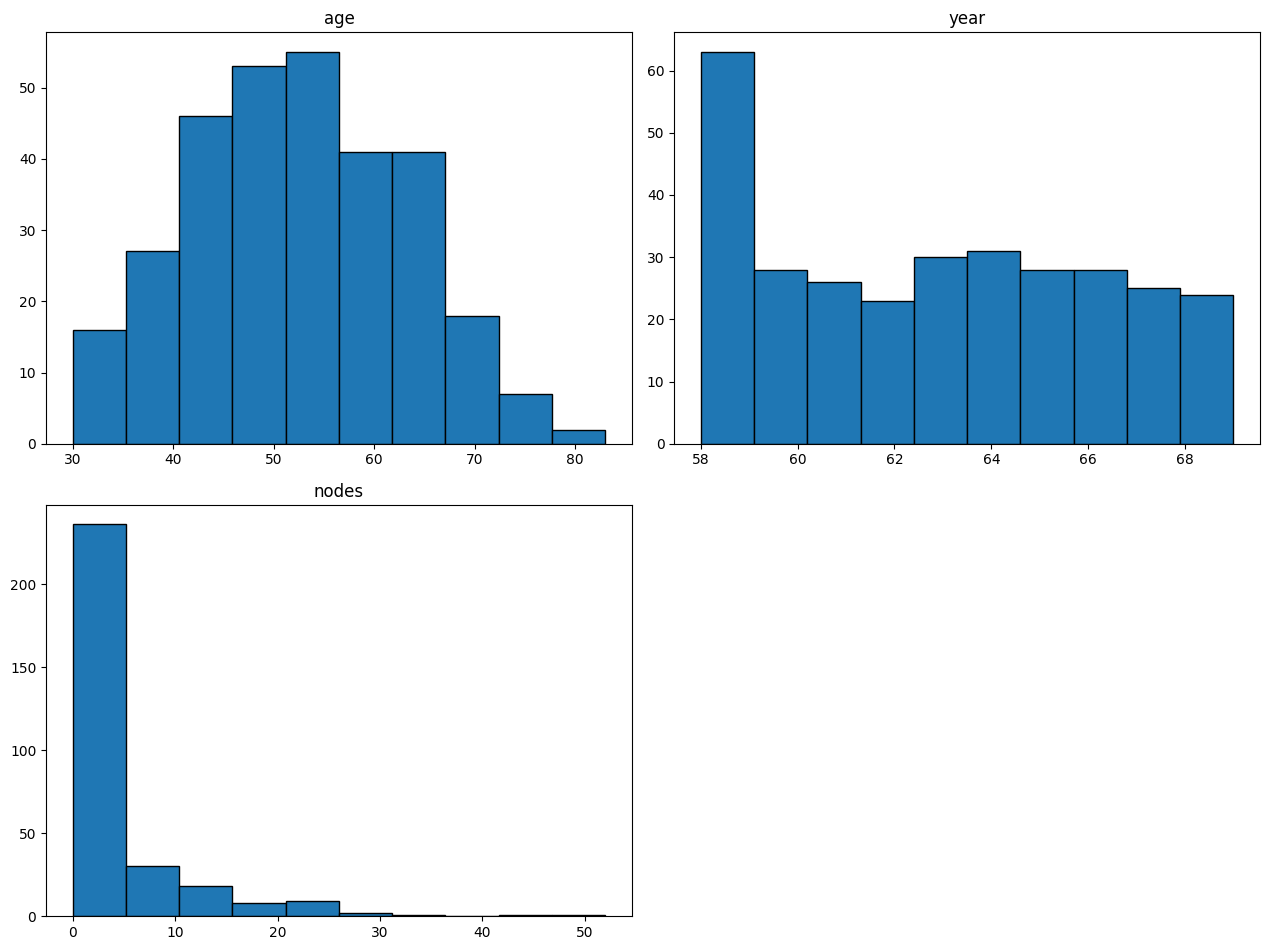

In [ ]:
print('Histogramas Habermans Survival:')
plt.figure(figsize=(8, 8))
data.hist(bins=10, grid=False, edgecolor='black')


plt.tight_layout(rect=[0, 0, 2, 2])  # Ajustar el layout para el título
plt.show()

Revisar datos faltantes

In [4]:
# Reviso el total de valores no nulos por columna
valores_no_nulos = data.count()
print("\nNúmero total de valores no nulos por columna:")
print(valores_no_nulos)

#veo cuantos valores si tienen nulos
print("\nConteo de valores NaN por columna:")
print(data.isna().sum())

# Columnas que contienen tanto valores como NaN
columnas_con_y_sin_datos = data.columns[data.notnull().any() & data.isnull().any()]

print("Columnas que contienen tanto valores como NaN:")
print(columnas_con_y_sin_datos)




Número total de valores no nulos por columna:
age       306
year      306
nodes     306
status    306
dtype: int64

Conteo de valores NaN por columna:
age       0
year      0
nodes     0
status    0
dtype: int64
Columnas que contienen tanto valores como NaN:
Index([], dtype='object')


Gráficas de barras para la columna categórica status (supervivencia).

status
1    225
2     81
Name: count, dtype: int64



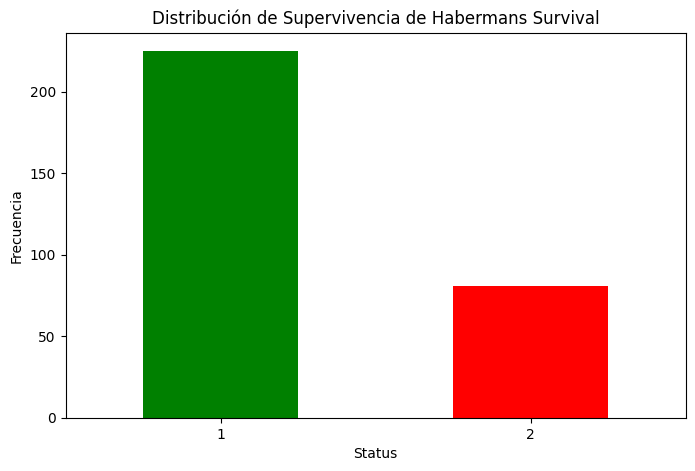

In [ ]:
# Contar
frecuencias = data['status'].value_counts()
print(frecuencias)
print()
# Crear
plt.figure(figsize=(8, 5))
frecuencias.plot(kind='bar', color=['green', 'red'])
plt.title('Distribución de Supervivencia de Habermans Survival')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()



Boxplots para identificar outliers en las columnas numéricas.

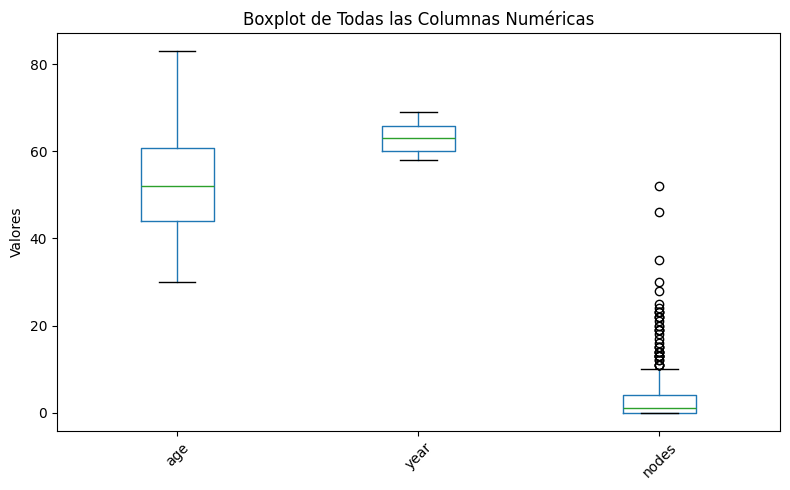

In [ ]:
plt.figure(figsize=(8, 5))
data.boxplot(grid=False)

plt.title('Boxplot de Todas las Columnas Numéricas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Matriz de correlación y mapa de calor.

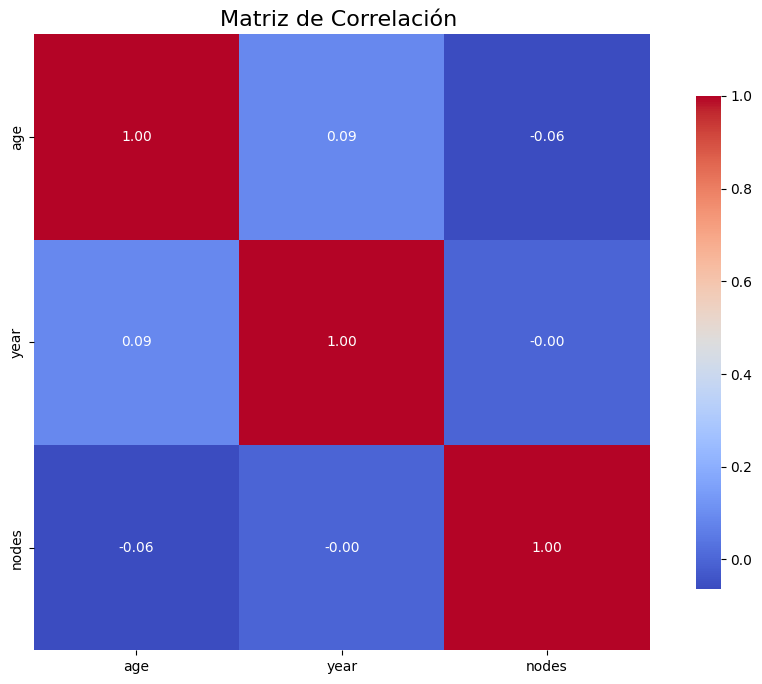

In [ ]:
correlation_matrix = data.select_dtypes(include=['int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación ', fontsize=16)
plt.show()

Pairplot para visualizar relaciones entre variables numéricas.

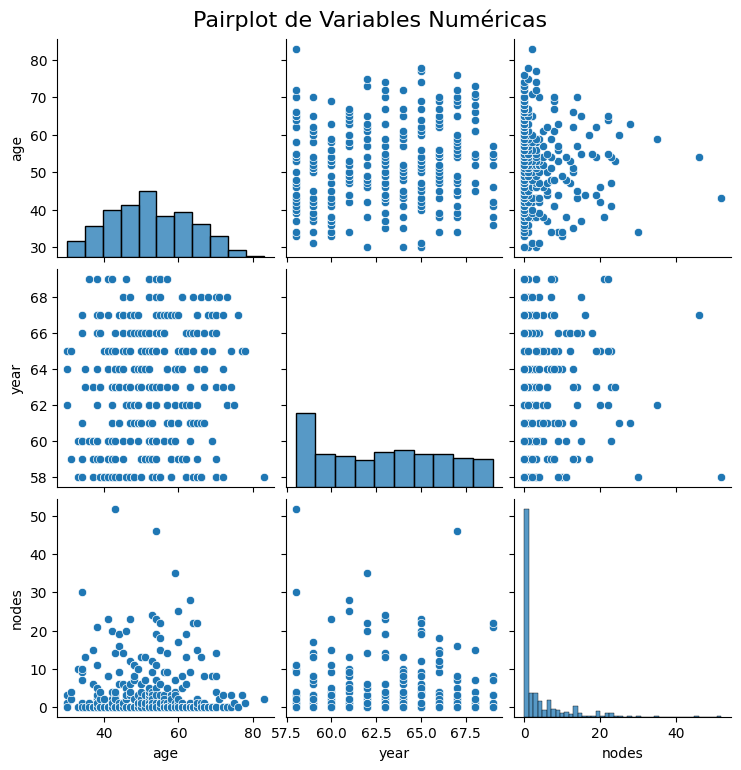

In [ ]:
# Crear un pairplot
sns.pairplot(data)

# Configurar el título
plt.suptitle('Pairplot de Variables Numéricas', fontsize=16, y=1.02)  # Ajustar la posición del título
plt.show()

Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas

In [ ]:
def normality_tests(data):
    results = {}
    for column in data.select_dtypes(include=[np.int64]).columns:
        shapiro_test = stats.shapiro(data[column])
        anderson_test = stats.anderson(data[column])
        ks_test = stats.kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))

        results[column] = {
            'Shapiro-Wilk': shapiro_test,
            'Anderson-Darling': anderson_test,
            'Kolmogorov-S': ks_test
        }
    return results

# Realizar pruebas de normalidad
normality_results = normality_tests(data)

# Mostrar resultados
for column, tests in normality_results.items():
    print(f"Resultados para {column}:")
    print(f"  Shapiro-Wilk: Estadístico={tests['Shapiro-Wilk'][0]}, p-valor={tests['Shapiro-Wilk'][1]}")
    print(f"  Anderson-Darling: Estadístico={tests['Anderson-Darling'].statistic}, valores críticos={tests['Anderson-Darling'].critical_values}")
  #  print(f"  Kolmogorov-Smirnov: Estadístico={tests['Kolmogorov-Smirnov'][0]}, p-valor={tests['Kolmogorov-Smirnov'][1]}")
    print(f"  Kolmogorov-Smirnov: Estadístico={tests['Kolmogorov-S'][0]}, p-valor={tests['Kolmogorov-S'][1]}") # Changed 'Kolmogorov-Smirnov' to 'Kolmogorov-S' to match the dictionary key
    print()


Resultados para age:
  Shapiro-Wilk: Estadístico=0.9894580410510909, p-valor=0.02604660000664947
  Anderson-Darling: Estadístico=0.7315605318482881, valores críticos=[0.569 0.648 0.777 0.906 1.078]
  Kolmogorov-Smirnov: Estadístico=0.04788832560742076, p-valor=0.46979698446746077

Resultados para year:
  Shapiro-Wilk: Estadístico=0.9467911740702332, p-valor=4.5689155599576554e-09
  Anderson-Darling: Estadístico=4.313736932221559, valores críticos=[0.569 0.648 0.777 0.906 1.078]
  Kolmogorov-Smirnov: Estadístico=0.1074107455317686, p-valor=0.0015766809559736457

Resultados para nodes:
  Shapiro-Wilk: Estadístico=0.6153078626306439, p-valor=1.320475620268899e-25
  Anderson-Darling: Estadístico=39.686615000651955, valores críticos=[0.569 0.648 0.777 0.906 1.078]
  Kolmogorov-Smirnov: Estadístico=0.28774266805535664, p-valor=6.343293940078173e-23



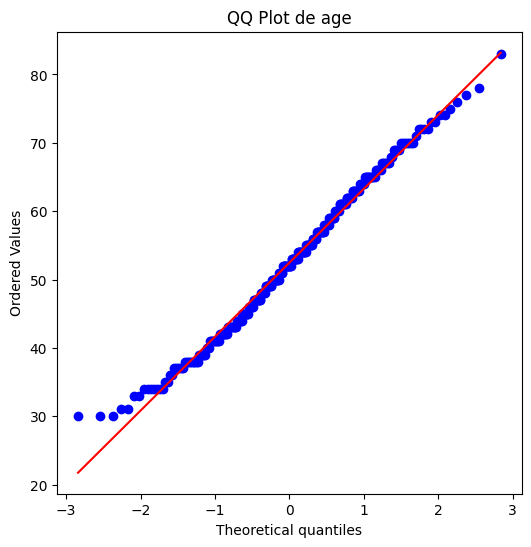

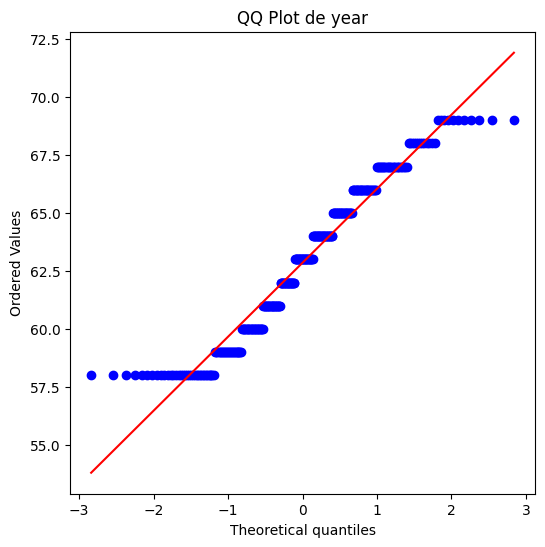

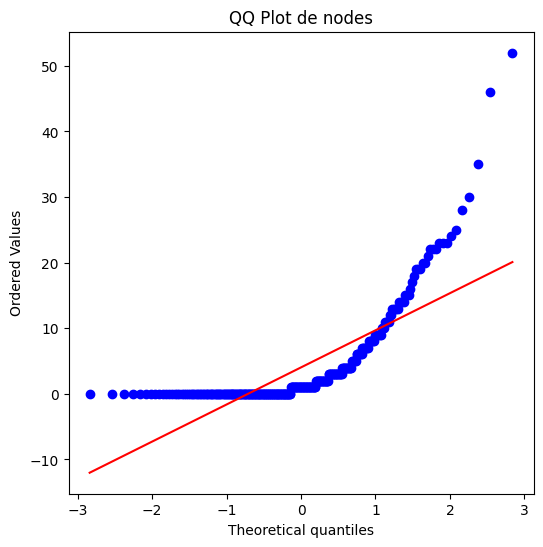

In [ ]:
#  QQ plots
for column in data.select_dtypes(include=[np.int64]).columns:
    plt.figure(figsize=(6, 6))
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot de {column}')
    plt.show()

Se buscaron outliers, y no se encontraron

In [7]:
def eliminar_outliers_iqr(df_cleaned):
    for column in df_cleaned.select_dtypes(include=['float64']).columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[(data[column] >= limite_inferior) & (data[column] <= limite_superior)]
    return df_cleaned

df_filtrado = eliminar_outliers_iqr(data)
print("DataFrame después de eliminar outliers:")
display(df_filtrado)

DataFrame después de eliminar outliers:


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
